# Small project on using PowerTransformer

# Type the process

1. Data load
2. Data Clean
3. Train_test_split
4. Without transformation check in linear regression
5. And Check Cross_val_score
6. EDA Analysis
7. With PowerTransformer using Box-Cox
8. Again (EDA) Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as state

In [2]:
df= pd.read_csv('/kaggle/input/concrete/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [4]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
X= df.drop(columns= ['Strength'])
y= df.iloc[:, -1]

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 0)

In [9]:
X_test.shape

(206, 8)

In [10]:
# Applying Regression without any transformation

lr= LinearRegression()
lr.fit(X_train, y_train)

y_pred= lr.predict(X_test)
print(r2_score(y_test,y_pred))

0.6369606518338298


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Cross checking with cross val score

lr= LinearRegression()
np.mean(cross_val_score(lr, X,y,scoring= 'r2'))

0.46099404916628617

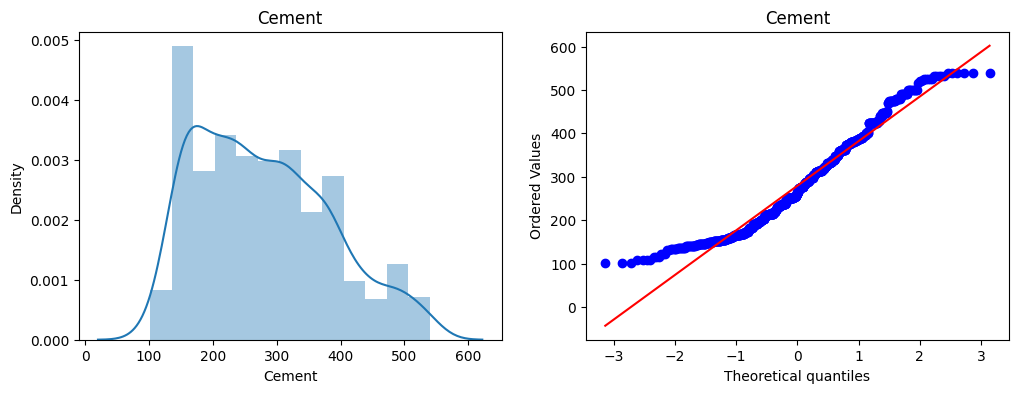

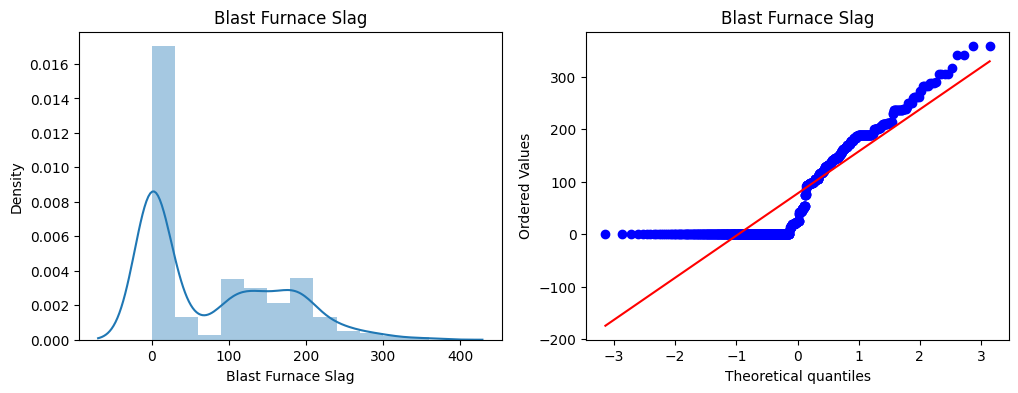

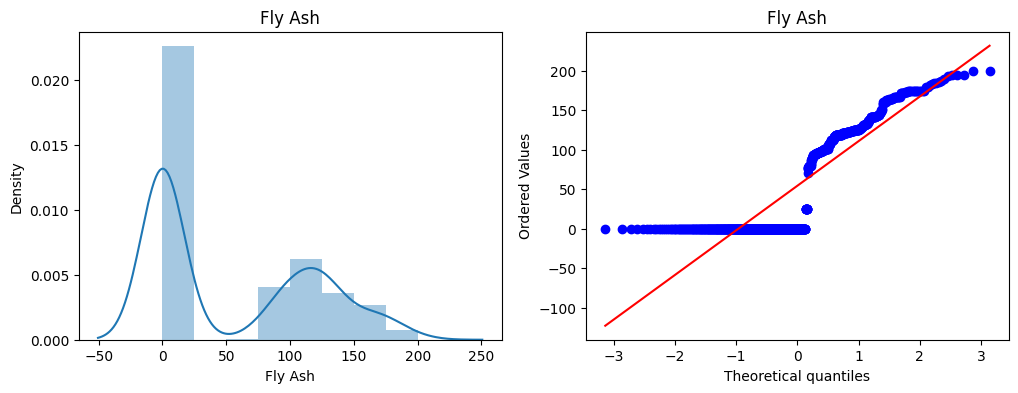

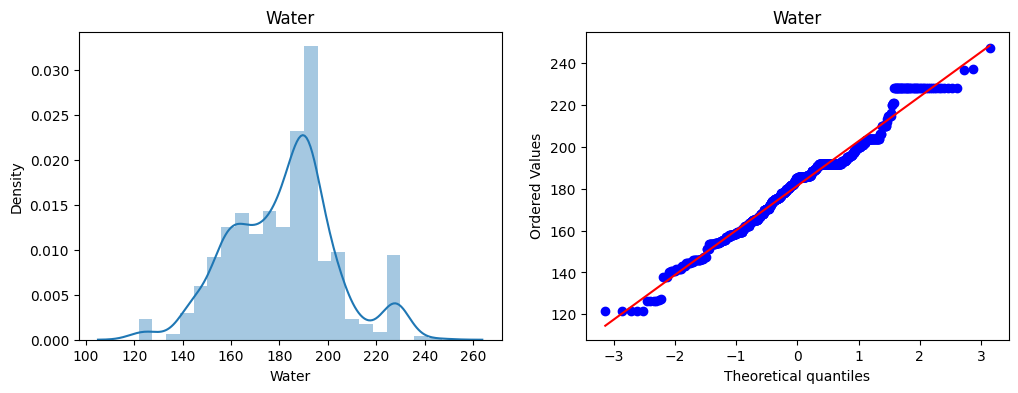

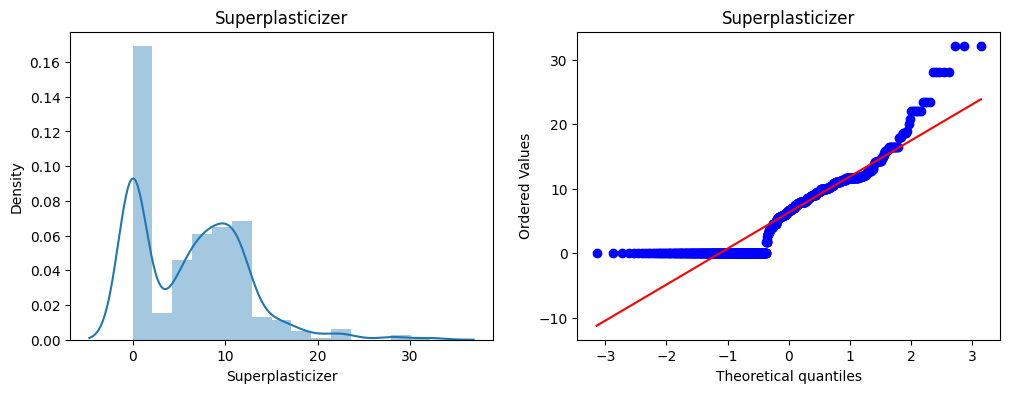

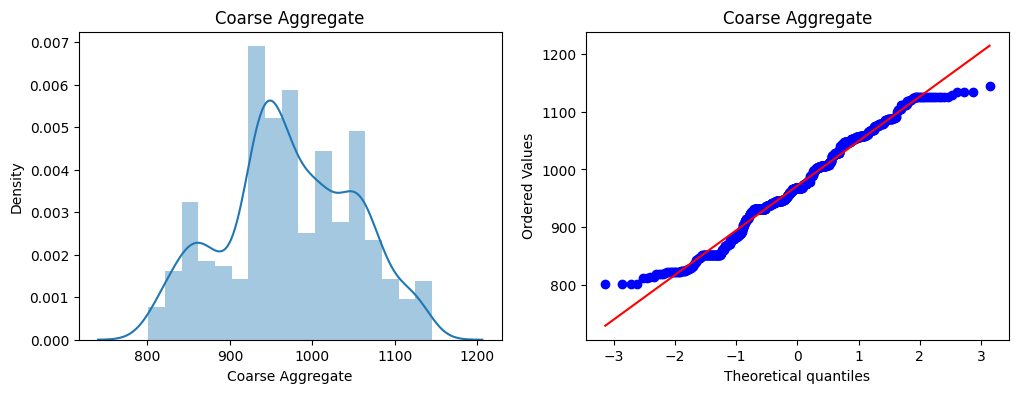

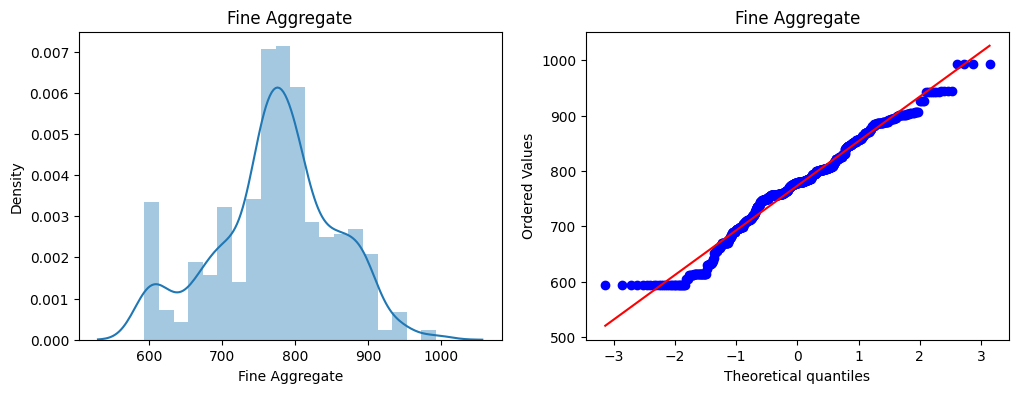

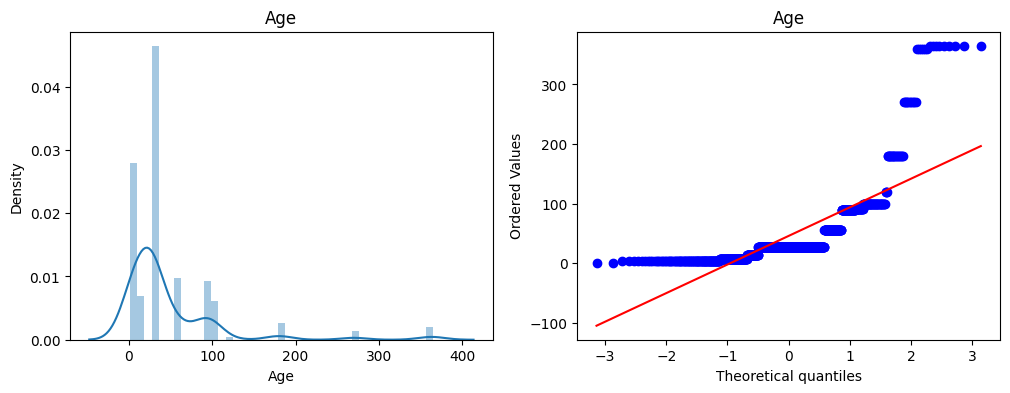

In [13]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize= (12, 4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    state.probplot(X_train[col], dist= 'norm', plot= plt)
    plt.title(col)
    plt.show()

In [14]:
# Applying Box-Cox Transform

pt= PowerTransformer(method= 'box-cox')

X_train_transform= pt.fit_transform(X_train+0.0000001)
X_test_transform= pt.transform(X_test+0.0000001)

pd.DataFrame({'col': X_train.columns, 'box_cox_lambda': pt.lambdas_})

,col,box_cox_lambda
0,Cement,0.153049
1,Blast Furnace Slag,0.028307
2,Fly Ash,-0.030326
3,Water,0.888072
4,Superplasticizer,0.096020
5,Coarse Aggregate,1.115681
6,Fine Aggregate,1.789591
7,Age,0.063010


In [15]:
# Applying linear regression on transformed data

lr= LinearRegression()
lr.fit(X_train_transform, y_train)

y_pred2= lr.predict(X_test_transform)
r2_score(y_test, y_pred2)

0.812926382206405

In [16]:
# Using cross val score

pt= PowerTransformer(method= 'box-cox')
X_transform= pt.fit_transform(X+0.0000001)

lr= LinearRegression()
np.mean(cross_val_score(lr,X_transform,y, scoring= 'r2'))

0.6658537939658903

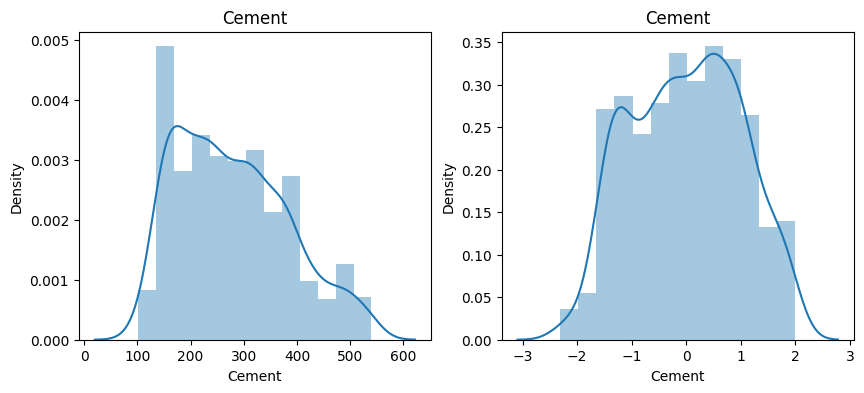

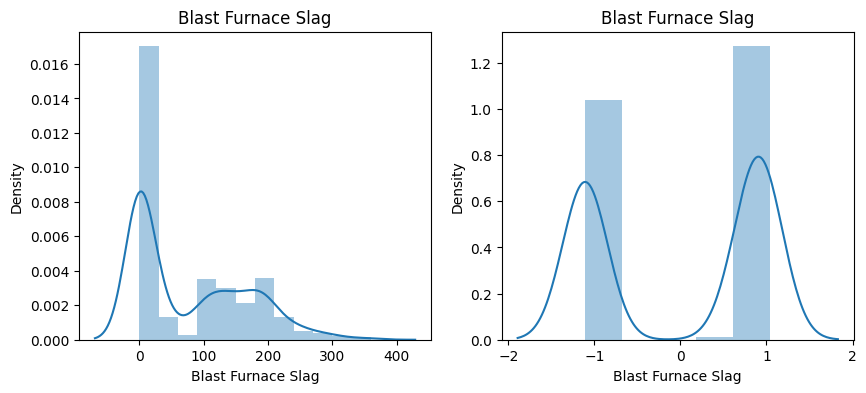

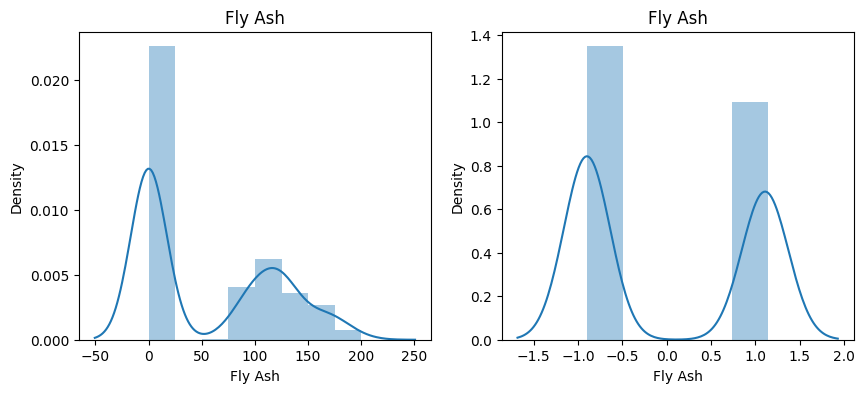

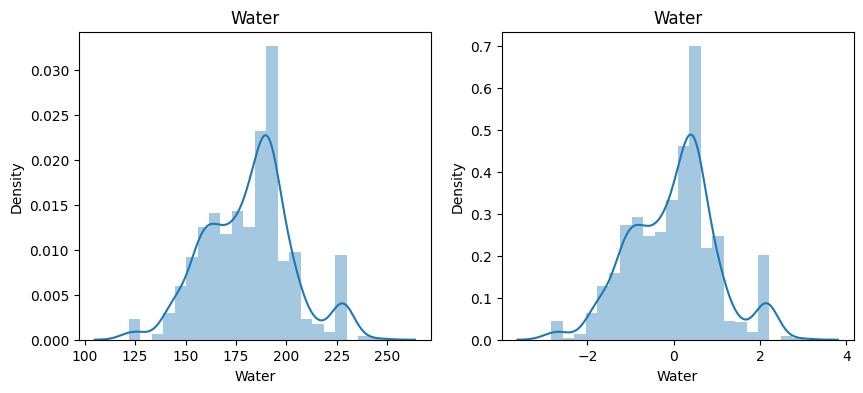

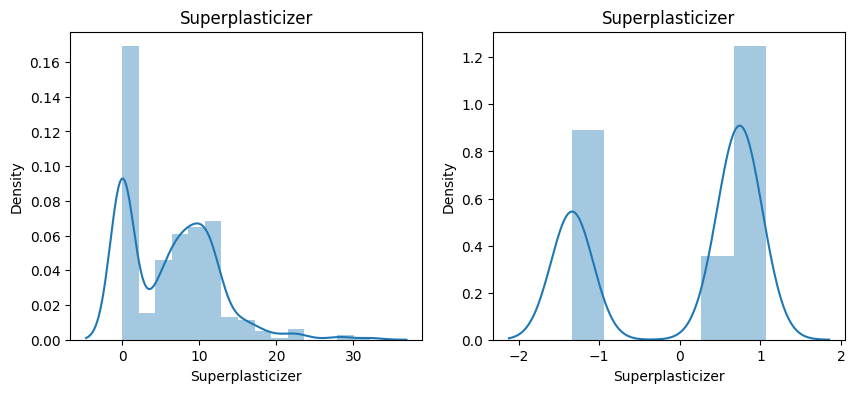

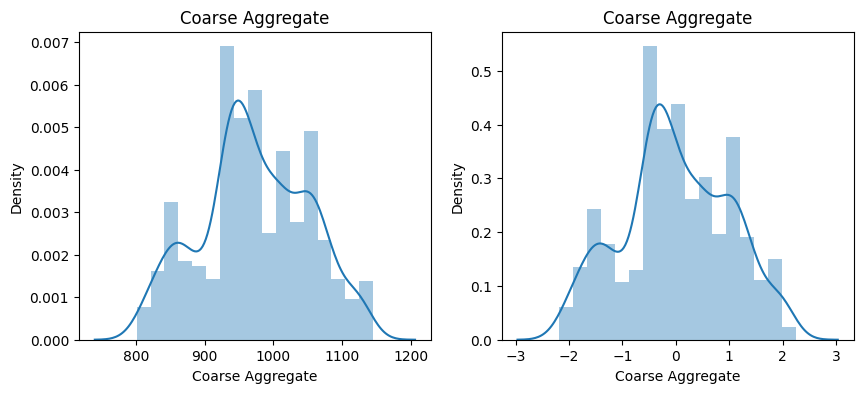

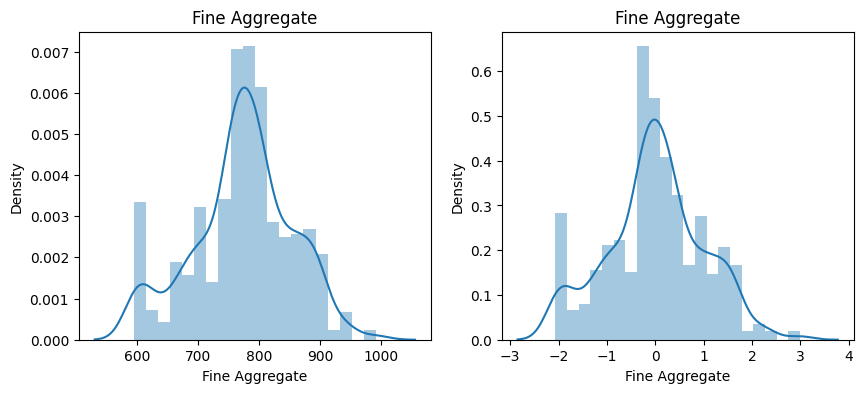

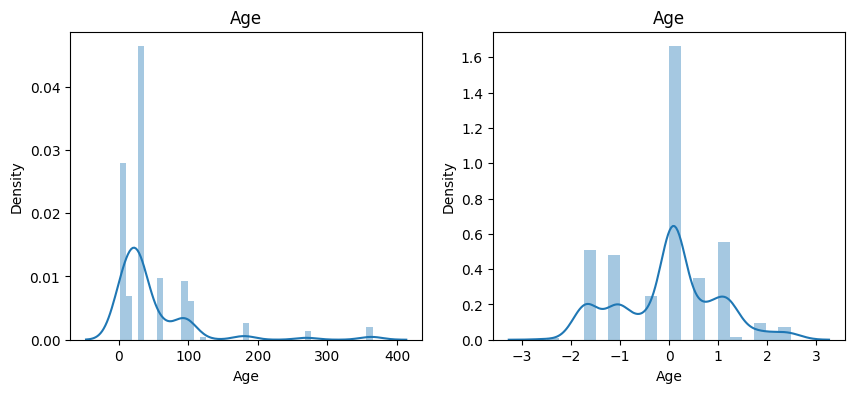

In [17]:
# Plotting the distplots without any transformation
X_train_transform= pd.DataFrame(X_train_transform, columns= X_train.columns)

for col in X_train_transform.columns:
    plt.figure(figsize= (10, 4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transform[col])
    plt.title(col)

    plt.show()